2.Data Preprocessing:

- Load the stock market data into a Pandas Data Frame for manipulation and analysis.

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\naini\Downloads\archive\stocks.csv', index_col=0, parse_dates=True)

# Display the DataFrame
print(df.head())


              Date        Open        High         Low       Close  \
Ticker                                                               
AAPL    2023-02-07  150.639999  155.229996  150.639999  154.649994   
AAPL    2023-02-08  153.880005  154.580002  151.169998  151.919998   
AAPL    2023-02-09  153.779999  154.330002  150.419998  150.869995   
AAPL    2023-02-10  149.460007  151.339996  149.220001  151.009995   
AAPL    2023-02-13  150.949997  154.259995  150.919998  153.850006   

         Adj Close    Volume  
Ticker                        
AAPL    154.414230  83322600  
AAPL    151.688400  64120100  
AAPL    150.639999  56007100  
AAPL    151.009995  57450700  
AAPL    153.850006  62199000  


C:\Users\naini\AppData\Local\Temp\ipykernel_2160\2900440653.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r'C:\Users\naini\Downloads\archive\stocks.csv', index_col=0, parse_dates=True)


- Check for missing values, outliers, or inconsistencies in the data and handle them appropriately (e.g.,
by filling missing values or removing outliers).

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\naini\Downloads\archive\stocks.csv', index_col=0, parse_dates=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check for outliers
outliers = df[(df['Volume'] > df['Volume'].quantile(0.99)) | 
              (df['Open'] > df['Open'].quantile(0.99)) |
              (df['High'] > df['High'].quantile(0.99)) |
              (df['Low'] > df['Low'].quantile(0.99)) |
              (df['Close'] > df['Close'].quantile(0.99)) |
              (df['Adj Close'] > df['Adj Close'].quantile(0.99))]

print("Outliers:\n", outliers)

# Handle missing values by filling them with the mean of the column
df.fillna(df.drop(columns=['Date']).mean(), inplace=True)

# Handle outliers by capping them at the 99th percentile
df.loc[df['Volume'] > df['Volume'].quantile(0.99), 'Volume'] = df['Volume'].quantile(0.99)
df.loc[df['Open'] > df['Open'].quantile(0.99), 'Open'] = df['Open'].quantile(0.99)
df.loc[df['High'] > df['High'].quantile(0.99), 'High'] = df['High'].quantile(0.99)
df.loc[df['Low'] > df['Low'].quantile(0.99), 'Low'] = df['Low'].quantile(0.99)
df.loc[df['Close'] > df['Close'].quantile(0.99), 'Close'] = df['Close'].quantile(0.99)
df.loc[df['Adj Close'] > df['Adj Close'].quantile(0.99), 'Adj Close'] = df['Adj Close'].quantile(0.99)

# Save the cleaned DataFrame to a new CSV file
df.to_csv("AAPL_historical_stock_data_cleaned.csv", index=False)


Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Outliers:
               Date        Open        High         Low       Close  \
Ticker                                                               
AAPL    2023-03-17  156.080002  156.740005  154.279999  155.000000   
AAPL    2023-05-05  170.979996  174.300003  170.759995  173.570007   
NFLX    2023-02-07  358.510010  364.179993  354.179993  362.950012   
NFLX    2023-02-08  360.019989  368.190002  358.309998  366.829987   
NFLX    2023-02-09  372.410004  373.829987  361.739990  362.500000   
NFLX    2023-02-10  359.160004  362.140015  347.140015  347.359985   
NFLX    2023-02-15  356.630005  362.880005  354.239990  361.420013   
GOOG    2023-02-09  100.540001  100.610001   93.860001   95.459999   

         Adj Close     Volume  
Ticker                         
AAPL    155.000000   98944600  
AAPL    173.570007  113316400  
NFLX    362.950012    628

C:\Users\naini\AppData\Local\Temp\ipykernel_3992\543744587.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r'C:\Users\naini\Downloads\archive\stocks.csv', index_col=0, parse_dates=True)
C:\Users\naini\AppData\Local\Temp\ipykernel_3992\543744587.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92985518.00000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Volume'] > df['Volume'].quantile(0.99), 'Volume'] = df['Volume'].quantile(0.99)


3. Data Analysis:

- Calculate descriptive statistics (e.g., mean, median, standard deviation) for key variables such as
stock prices and trading volumes.

In [42]:
import pandas as pd

# Load the cleaned DataFrame
df = pd.read_csv("AAPL_historical_stock_data_cleaned.csv")

# Calculate descriptive statistics for key variables
statistics = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()

print("Descriptive Statistics:")
print(statistics)


Descriptive Statistics:
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.191502  217.862136  212.650457  215.356259  215.337283   
std     91.591874   92.769610   90.072116   91.420529   91.413281   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177505  307.565002  295.437500  303.942505  303.942505   
max    358.854507  363.977896  354.211791  361.992406  361.992406   

             Volume  
count  2.480000e+02  
mean   3.195669e+07  
std    2.194601e+07  
min    2.657900e+06  
25%    1.714180e+07  
50%    2.734000e+07  
75%    4.771772e+07  
max    9.298552e+07  


- Perform time series analysis to identify trends, seasonality, and patterns in the data.

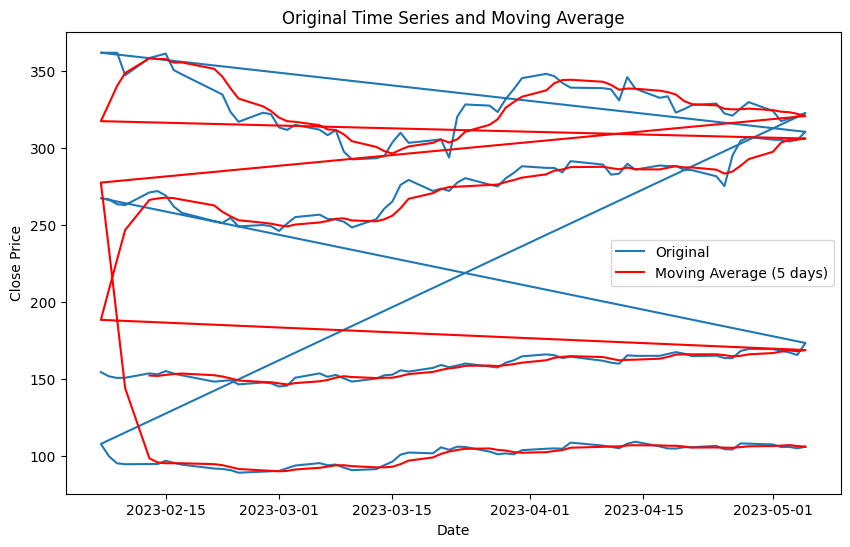

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
df = pd.read_csv("AAPL_historical_stock_data_cleaned.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Select the column you want to analyze (e.g., 'Close' price)
data = df['Close']

# Calculate a simple moving average with a window size of 5 (for example)
moving_avg = data.rolling(window=5).mean()

# Plot the original time series and its moving average
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(moving_avg, color='red', label='Moving Average (5 days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Time Series and Moving Average')
plt.legend()
plt.show()


- Compute financial metrics such as moving averages, Relative Strength Index (RSI), and volatility to
assess market conditions.

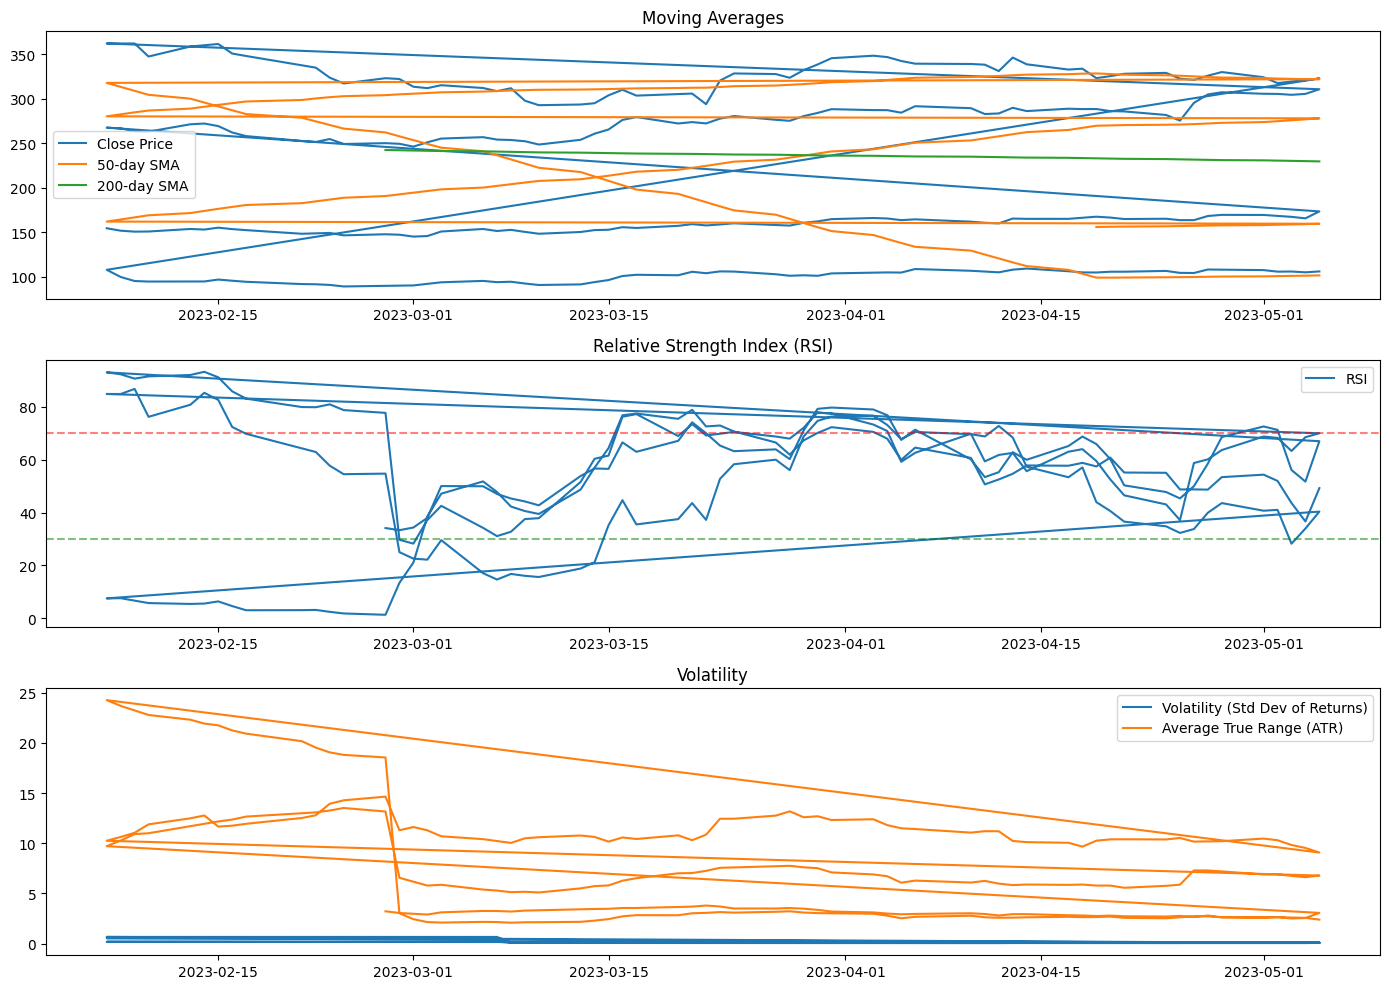

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
df = pd.read_csv("AAPL_historical_stock_data_cleaned.csv")

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to analyze (e.g., 'Close' price)
close_price = df['Close']

# Compute moving averages
# Simple Moving Average (SMA)
sma_50 = close_price.rolling(window=50).mean()  # 50-day SMA
sma_200 = close_price.rolling(window=200).mean()  # 200-day SMA

# Exponential Moving Average (EMA)
ema_12 = close_price.ewm(span=12, adjust=False).mean()  # 12-day EMA
ema_26 = close_price.ewm(span=26, adjust=False).mean()  # 26-day EMA

# Compute Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi = compute_rsi(close_price)

# Compute volatility
# Standard deviation of returns
returns = close_price.pct_change()
volatility_std = returns.rolling(window=20).std() * np.sqrt(20)

# Average True Range (ATR)
high_low_range = df['High'] - df['Low']
high_close_range = np.abs(df['High'] - df['Close'].shift())
low_close_range = np.abs(df['Low'] - df['Close'].shift())
true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
atr = true_range.rolling(window=14).mean()

# Plot the computed metrics
plt.figure(figsize=(14, 10))

# Moving averages
plt.subplot(3, 1, 1)
plt.plot(close_price, label='Close Price')
plt.plot(sma_50, label='50-day SMA')
plt.plot(sma_200, label='200-day SMA')
plt.legend()
plt.title('Moving Averages')

# RSI
plt.subplot(3, 1, 2)
plt.plot(rsi, label='RSI')
plt.axhline(y=70, color='r', linestyle='--', alpha=0.5)  # Overbought threshold
plt.axhline(y=30, color='g', linestyle='--', alpha=0.5)  # Oversold threshold
plt.legend()
plt.title('Relative Strength Index (RSI)')

# Volatility
plt.subplot(3, 1, 3)
plt.plot(volatility_std, label='Volatility (Std Dev of Returns)')
plt.plot(atr, label='Average True Range (ATR)')
plt.legend()
plt.title('Volatility')

plt.tight_layout()
plt.show()


4. Data Visualization:

- Use Matplotlib and Seaborn libraries to create visualizations of stock market trends.

c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


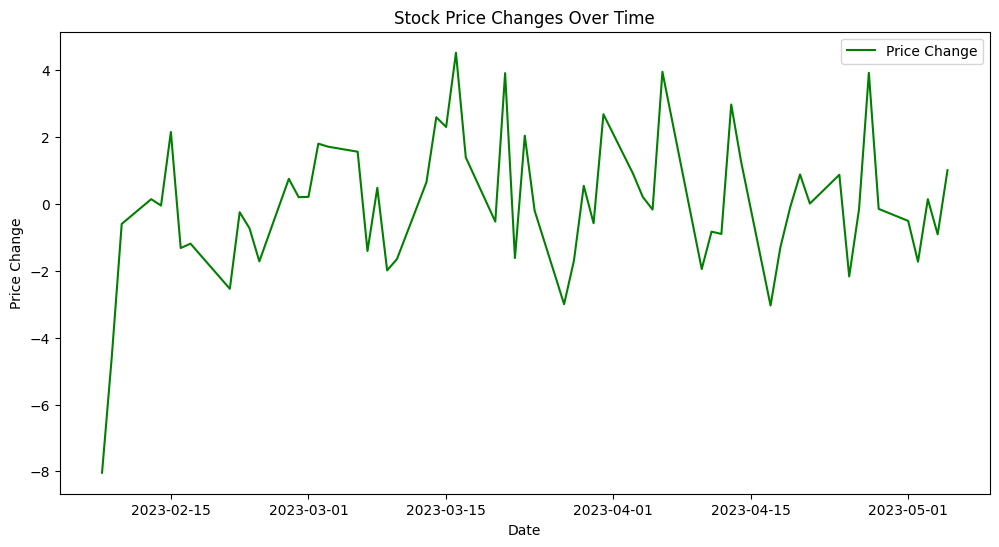

c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


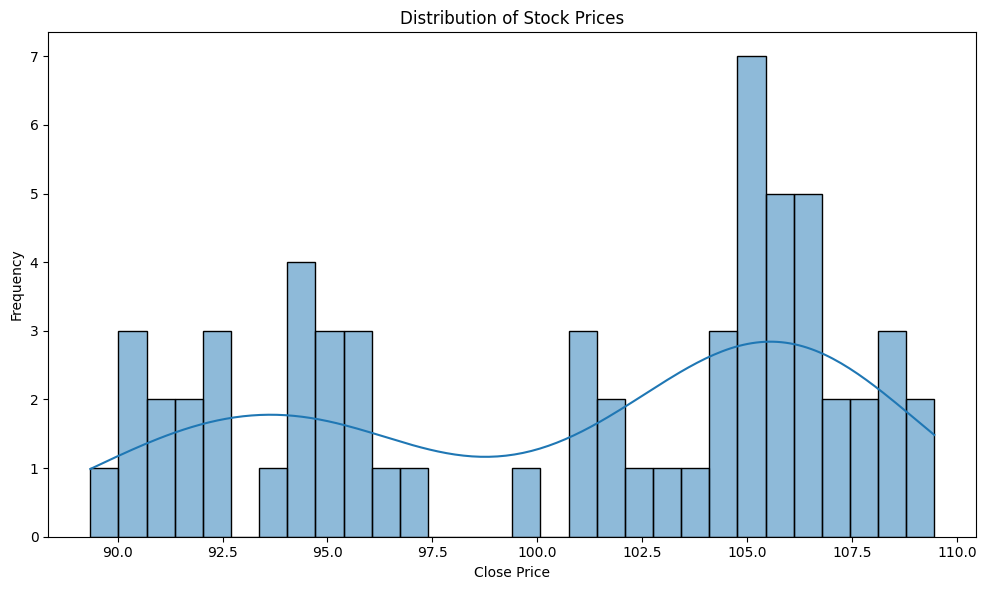

c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


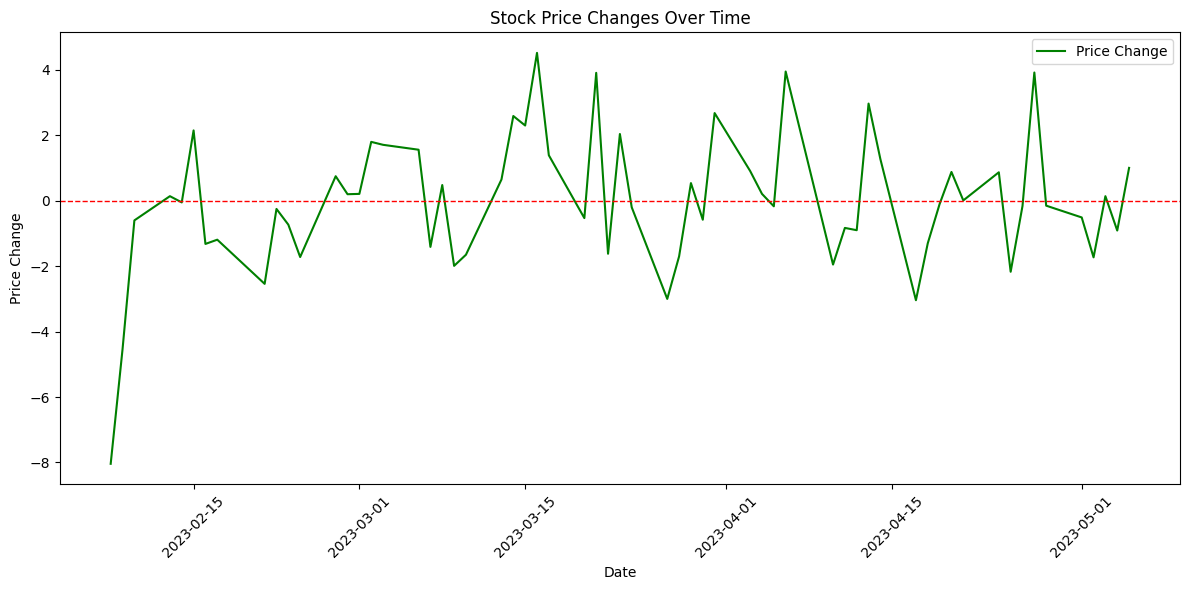

c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\naini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


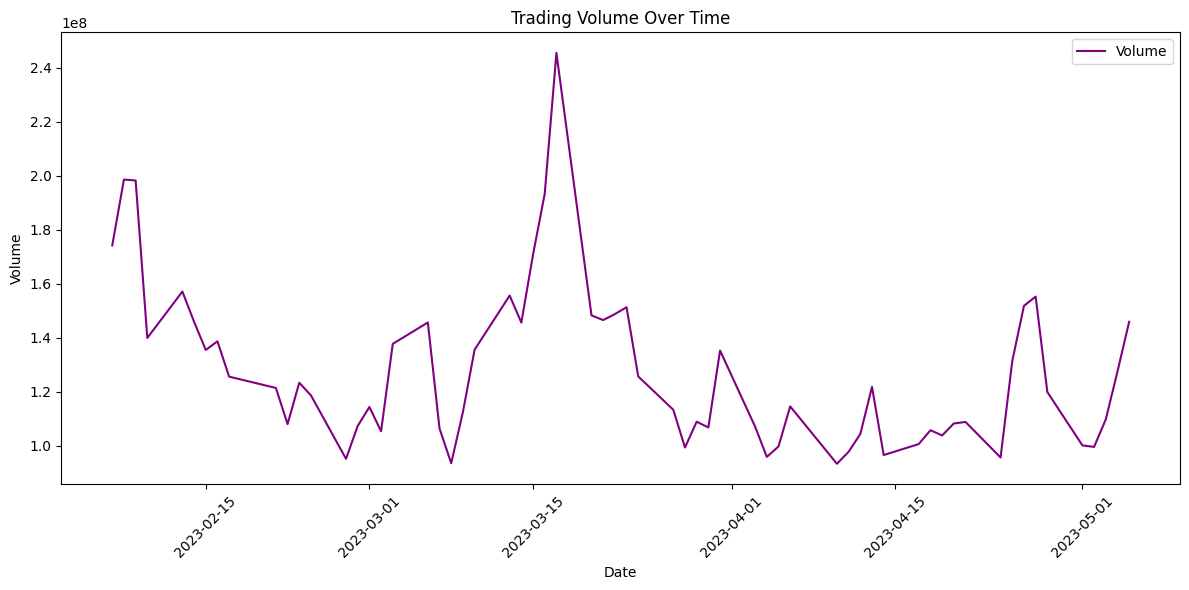

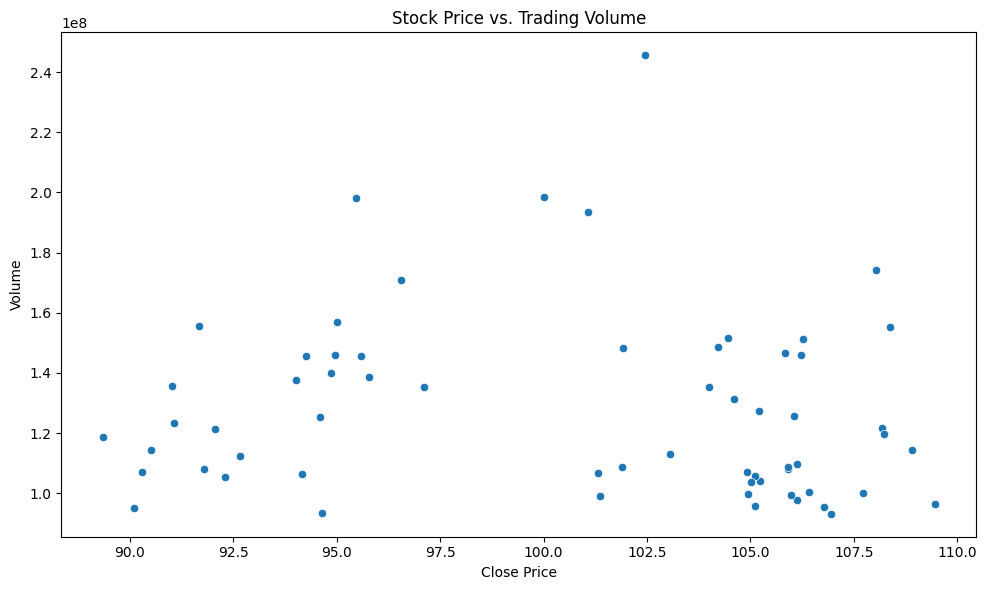

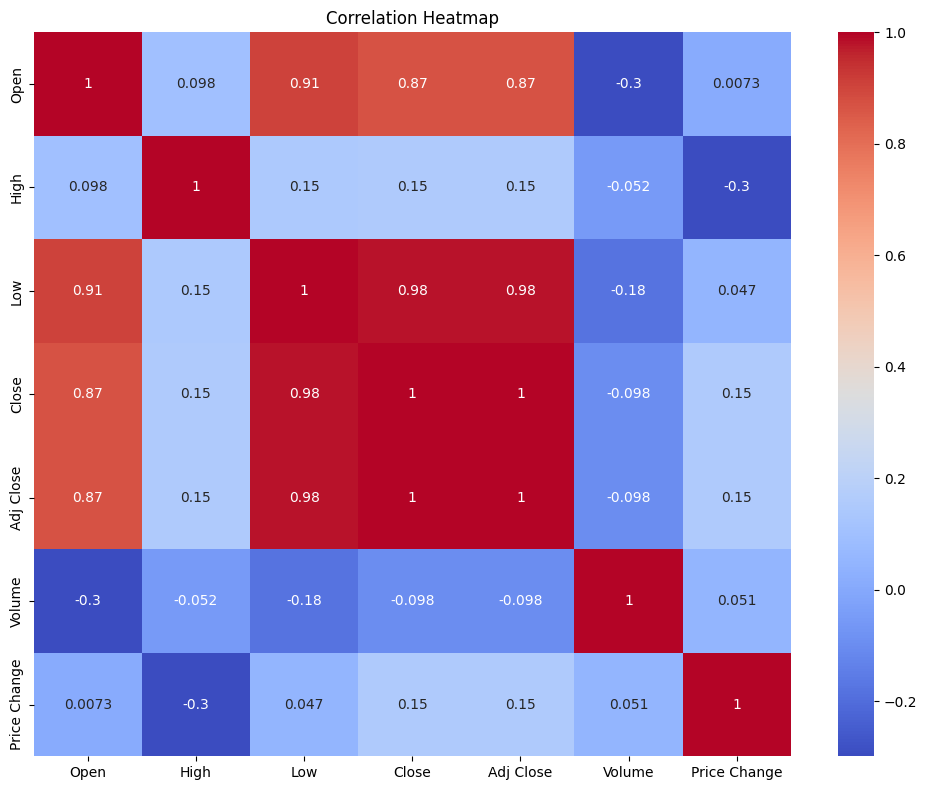

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Date' and aggregate the other columns
df = df.groupby('Date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Adj Close': 'last', 'Volume': 'sum'})

# Calculate price change
df['Price Change'] = df['Close'].diff()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Price Change', data=df, color='g', label='Price Change')
plt.title('Stock Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()


# Plot stock price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot stock price changes over time
plt.figure(figsize=(12, 6))
df['Price Change'] = df['Close'].diff()  # Calculate price change
sns.lineplot(x='Date', y='Price Change', data=df, color='g', label='Price Change')
plt.title('Stock Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add zero line for reference
plt.tight_layout()
plt.show()

# Plot trading volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=df, color='purple', label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot stock price vs. trading volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Close', y='Volume', data=df)
plt.title('Stock Price vs. Trading Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# Plot stock price correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


- Plot time series line charts of stock prices over time, with separate plots for open, high, low, and close prices.

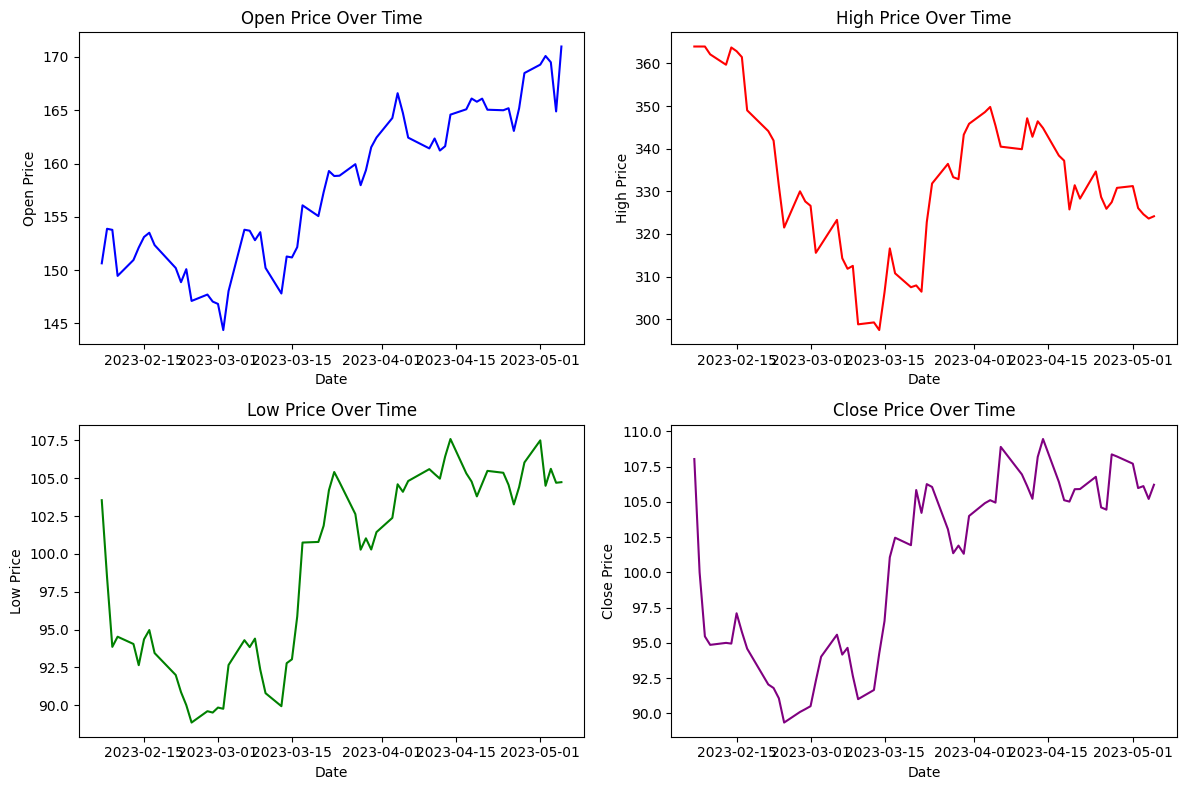

In [63]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame called 'df'

# Plotting
plt.figure(figsize=(12, 8))

# Plot Open prices
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Open'], color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')

# Plot High prices
plt.subplot(2, 2, 2)
plt.plot(df.index, df['High'], color='red')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')

# Plot Low prices
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Low'], color='green')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')

# Plot Close prices
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Close'], color='purple')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()


- Visualize trading volumes using bar charts or histograms to show changes in trading activity over
time

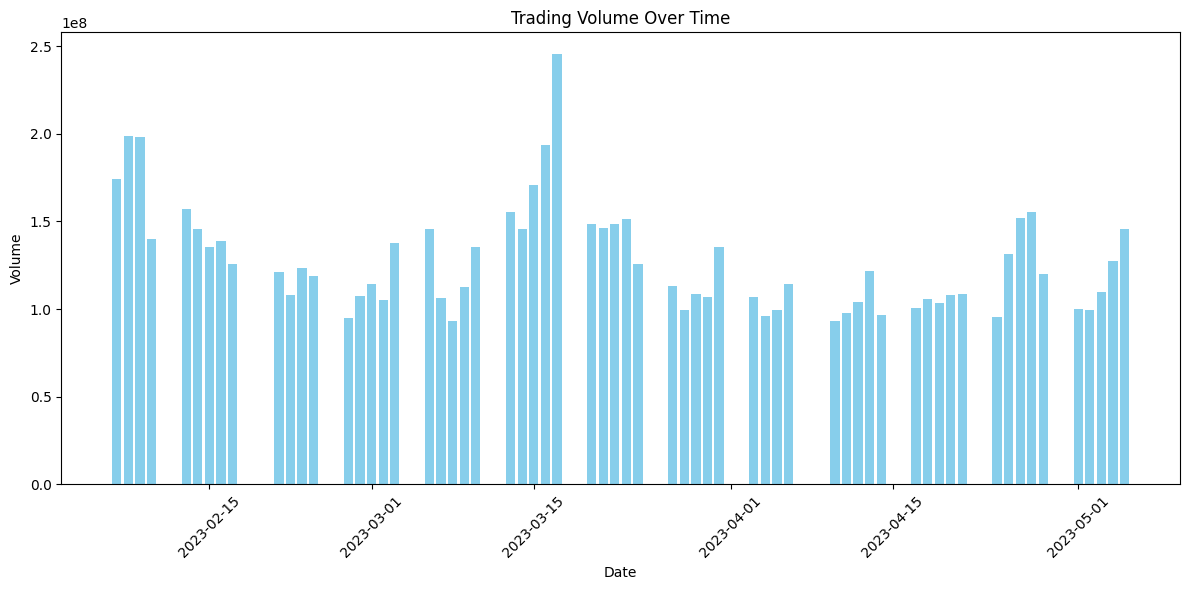

In [64]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame called 'df'

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar chart for trading volumes
plt.bar(df.index, df['Volume'], color='skyblue')

# Add labels and title
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


- Create additional plots to visualize financial metrics and indicators (e.g., moving averages, RSI) for trend analysis

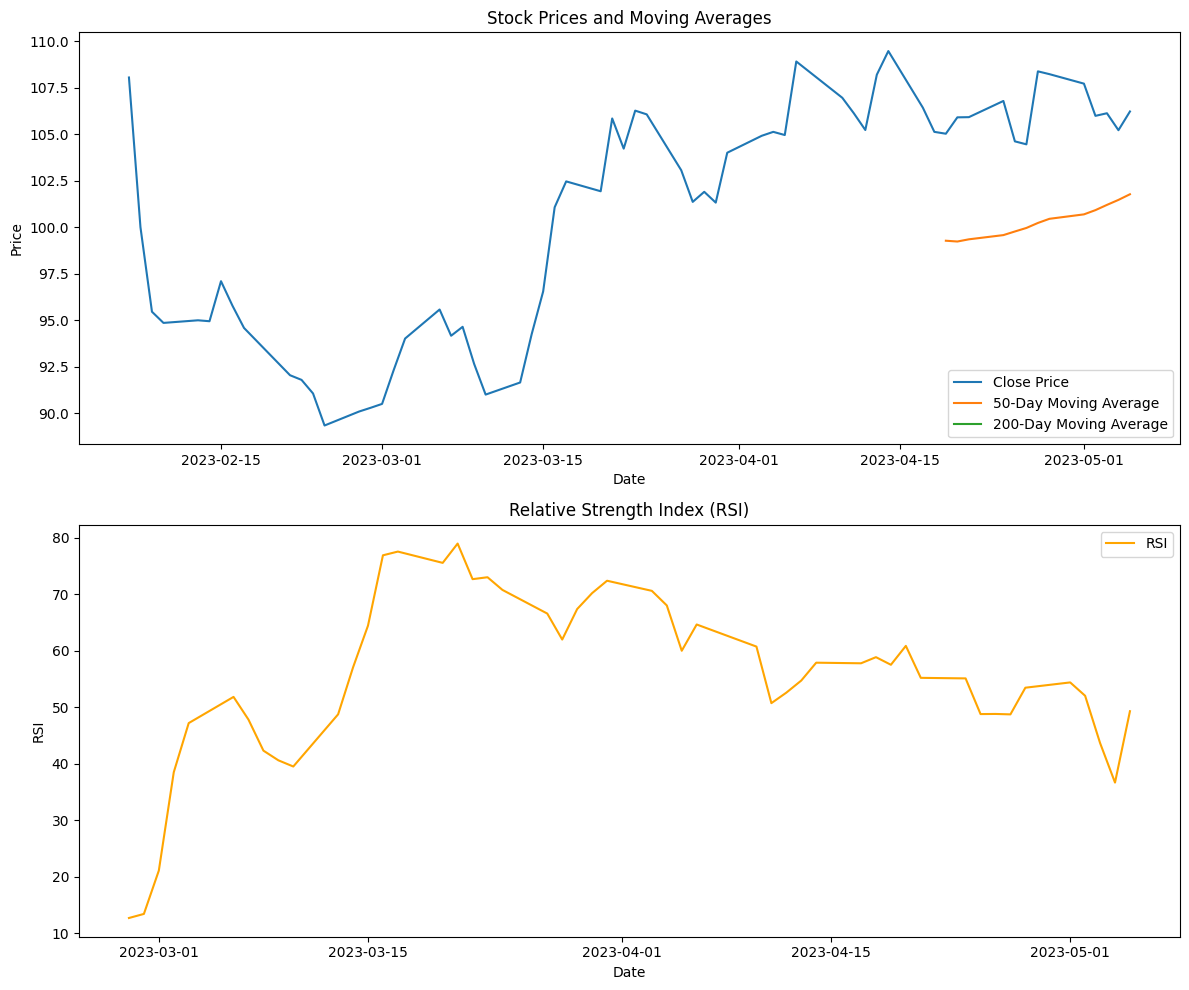

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded the data into a DataFrame called 'df'

# Calculate moving averages (e.g., 50-day and 200-day)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

df['RSI'] = calculate_rsi(df)

# Plotting
plt.figure(figsize=(12, 10))

# Subplot 1: Stock Prices and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA50'], label='50-Day Moving Average')
plt.plot(df.index, df['MA200'], label='200-Day Moving Average')
plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Subplot 2: Relative Strength Index (RSI)
plt.subplot(2, 1, 2)
plt.plot(df.index, df['RSI'], color='orange', label='RSI')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()
